In [25]:
import pandas as pd
import matplotlib.pyplot as plt

In [18]:
df = pd.read_csv("financial_dashboard_data1.csv", encoding="utf-8")

In [21]:
df = df.sort_values(by="MonthNum")

In [23]:
print(df.head())

      Month    Product     Category  Revenue   Cost  Units Sold  Profit  \
3   January  Product D         Toys    10578   9231         472    1347   
2   January  Product C      Fashion    11265   3466         314    7799   
1   January  Product B      Fashion    10191   6772         120    3419   
0   January  Product A      Fashion    12270   3860         370    8410   
4  February  Product A  Electronics    16111  11322         761    4789   

   MonthNum  
3         1  
2         1  
1         1  
0         1  
4         2  


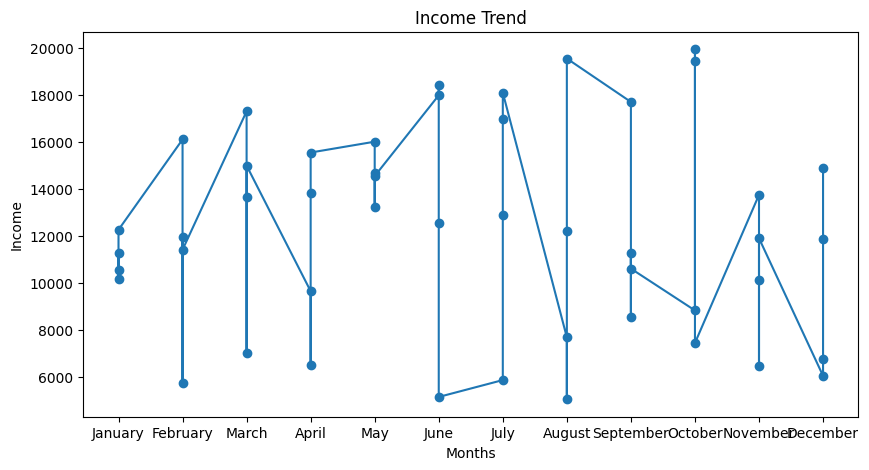

In [26]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.plot(df["Month"], df["Revenue"], marker="o", linestyle="-")
plt.xlabel("Months")
plt.ylabel("Income")
plt.title("Income Trend")
plt.show()


In [27]:
pip install statsmodels

   ---------------------------------------- 0.0/9.8 MB ? eta -:--:--
   -------------------------------- ------- 7.9/9.8 MB 38.1 MB/s eta 0:00:01
   ---------------------------------------- 9.8/9.8 MB 35.4 MB/s eta 0:00:00
   ---------------------------------------- 0.0/41.0 MB ? eta -:--:--
   ------- -------------------------------- 7.9/41.0 MB 38.5 MB/s eta 0:00:01
   ---------------- ----------------------- 17.0/41.0 MB 40.9 MB/s eta 0:00:01
   ------------------------- -------------- 26.5/41.0 MB 41.8 MB/s eta 0:00:01
   --------------------------------- ------ 34.6/41.0 MB 40.9 MB/s eta 0:00:01
   ---------------------------------------  40.9/41.0 MB 39.3 MB/s eta 0:00:01
   ---------------------------------------- 41.0/41.0 MB 36.1 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [28]:
from statsmodels.tsa.arima.model import ARIMA


In [ ]:
# Define the ARIMA model
modelo = ARIMA(df["Revenue"], order=(2,1,2))
modelo_fit = modelo.fit()


c:\Users\santi\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
c:\Users\santi\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
c:\Users\santi\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)


In [31]:
# Generate predictions
predicciones = modelo_fit.forecast(steps=6)

c:\Users\santi\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\santi\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [44]:
print(df.dtypes)


Month         object
Product       object
Category      object
Revenue        int64
Cost           int64
Units Sold     int64
Profit         int64
MonthNum       int64
dtype: object


In [ ]:
# Ensure that MonthNum is a valid number
df["MonthNum"] = pd.to_numeric(df["MonthNum"], errors="coerce")


In [ ]:
# Convert MonthNum to full dates
df["MonthDate"] = pd.to_datetime("2025-" + df["MonthNum"].astype(str) + "-01", format="%Y-%m-%d")

In [ ]:
# Verify that the conversion is correct
print(df[["MonthNum", "MonthDate"]].head())

   MonthNum  MonthDate
3         1 2025-01-01
2         1 2025-01-01
1         1 2025-01-01
0         1 2025-01-01
4         2 2025-02-01


In [ ]:
# Forecasting
pip install statsmodels

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
# Create DataFrame with future dates
future_dates = pd.date_range(start=df["MonthDate"].max(), periods=6, freq="M")
forecast_df = pd.DataFrame({"MonthDate": future_dates, "ForecastedRevenue": predicciones})


C:\Users\santi\AppData\Local\Temp\ipykernel_28776\1079460923.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  future_dates = pd.date_range(start=df["MonthDate"].max(), periods=6, freq="M")


In [ ]:
# Save to CSV
forecast_df.to_csv("forecast_results.csv", index=False)